### Práctica de Bosques Japoneses

### Partiendo del conjunto de datos indicado y el código inicial que se ofrece para la carga de datos, realice las siguientes tareas:

#### Fuente https://archive.ics.uci.edu/dataset/333/forest+type+mapping 

#### 1.- Realizar análisis de PCA para detectar los componentes más relevantes. Visualizar los CVRs y decidir los PCs a usar (por ejemplo 3) 
#### 2.- Con los datos obtenidos, realizar análisis de clustering, en el que se emplee varios algoritmos vistos: K.Means, Clustering Jerárquico (Aglomerativo), DFSCAN (Anadir librerías necesarias)
#### 3.- Realizar diferentes pruebas con hiperparámetros de dichos algoritmos de clustering para obtener agrupaciones optimizadas
#### 3.- Generar visualizaciones (por ejemplo, scatter plots, heatmaps, etc.) sobre los resultados de los algoritmos de PCA y clustering
#### 4.- Incluir breves razonamientos explicativos de los resultados

In [2]:

import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
warnings.filterwarnings(action='ignore') 
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv('./datasets/bosques-japoneses.csv', header='infer')

#### Este conjuto de datos contiene 198 muestras con 27 variables y 4 clases de clasificación,

In [4]:
df_features =  df.drop(columns=['class'])
df_target = df['class']

In [5]:
df_features

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,39,36,57,91,59,101,93,27,60,75.70,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,84,30,57,112,51,98,92,26,62,30.58,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,53,25,49,99,51,93,84,26,58,63.20,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,59,26,49,103,47,92,82,25,56,55.54,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,57,49,66,103,64,106,114,28,59,59.44,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,55,61,90,75,55,91,84,24,54,57.14,...,1.28,-20.84,-1.47,-5.72,-18.73,-1.18,-5.22,-17.81,-1.28,-3.87
194,66,69,93,90,63,100,99,25,57,45.97,...,-1.50,-19.64,-1.45,-5.60,-17.03,-1.08,-5.15,-16.77,-1.46,-4.03
195,79,30,55,115,51,96,109,25,59,35.40,...,-3.66,-22.40,-3.91,-6.61,-36.29,-2.13,-5.77,-23.32,-2.09,-4.13
196,69,27,53,106,47,90,87,24,55,35.81,...,-0.88,-13.32,0.16,-2.39,-7.12,0.02,-2.06,-10.04,-0.74,-2.88


In [6]:
df_target

0      d 
1      h 
2      s 
3      s 
4      d 
       ..
193    d 
194    d 
195    h 
196    h 
197    h 
Name: class, Length: 198, dtype: object

In [7]:
standardized = StandardScaler()
standardized.fit(df_features)
scaled_data = standardized.transform(df_features)
X = scaled_data
X

array([[-1.8787969 , -0.28223274, -0.3865936 , ..., -0.6987643 ,
        -2.01261582, -1.87322805],
       [ 1.6513761 , -0.61954914, -0.3865936 , ..., -0.87250077,
        -4.04786229, -3.37519212],
       [-0.78052085, -0.90064614, -0.84980409, ..., -0.2157387 ,
        -1.40259644, -1.47371572],
       ...,
       [ 1.25913466, -0.61954914, -0.50239623, ..., -0.85531804,
        -0.28792467,  0.01307699],
       [ 0.47465177, -0.78820734, -0.61819885, ...,  1.68008902,
         0.46073548,  0.64521675],
       [ 1.33758295, -0.67576854, -0.50239623, ..., -0.39520276,
         0.37200539,  0.23053307]], shape=(198, 27))

## 1 - PCA

Reducimos la dimensionalidad de los datos a 3 componentes principales y lo visualizamos

In [8]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [9]:
X_pca.shape

(198, 3)

Visualizamos en 3 dimensiones

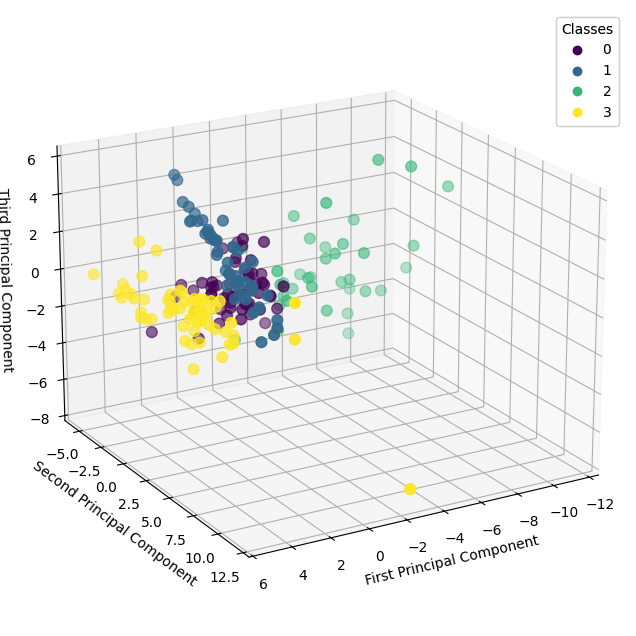

In [12]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], s=60, c=df_target.astype('category').cat.codes, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(20, 60)
plt.show()

Podemos visualizar en 2 dimensiones, si gráficamos la primera componente principal contra la segunda, la primera contra la tercera y la segunda contra la tercera, para hacernos una idea.

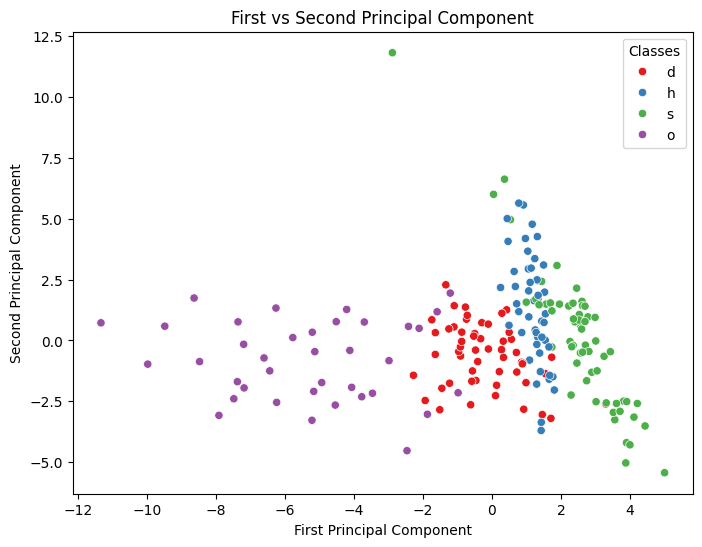

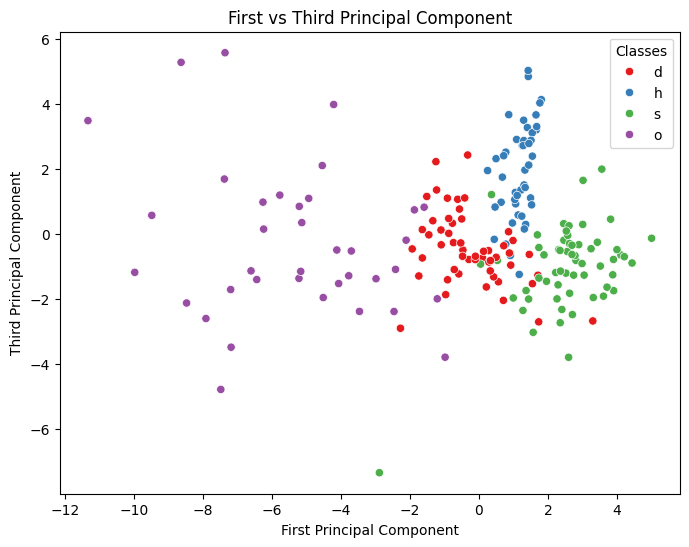

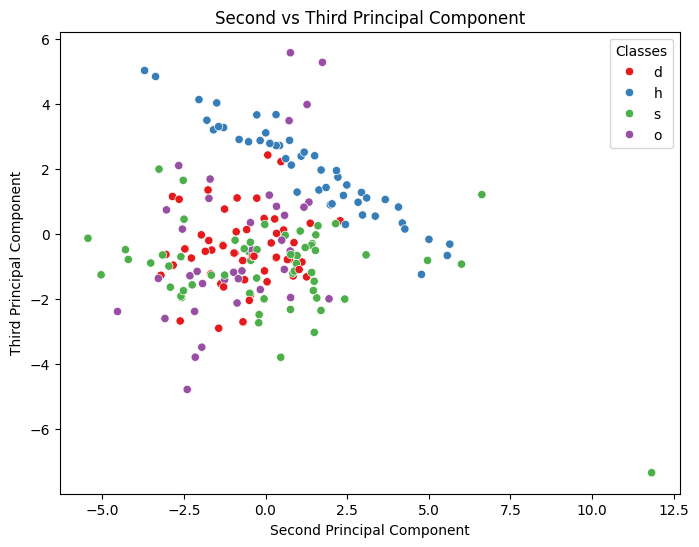

In [13]:
# First plot: First vs Second Principal Component
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_target, palette='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First vs Second Principal Component')
plt.legend(title='Classes')
plt.show()

# Second plot: First vs Third Principal Component
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 2], hue=df_target, palette='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('First vs Third Principal Component')
plt.legend(title='Classes')
plt.show()

# Third plot: Second vs Third Principal Component
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 2], hue=df_target, palette='Set1')
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('Second vs Third Principal Component')
plt.legend(title='Classes')
plt.show()

Podríamos visualizar la importancia de cada variable en los componentes principales, de la siguiente forma:

In [14]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

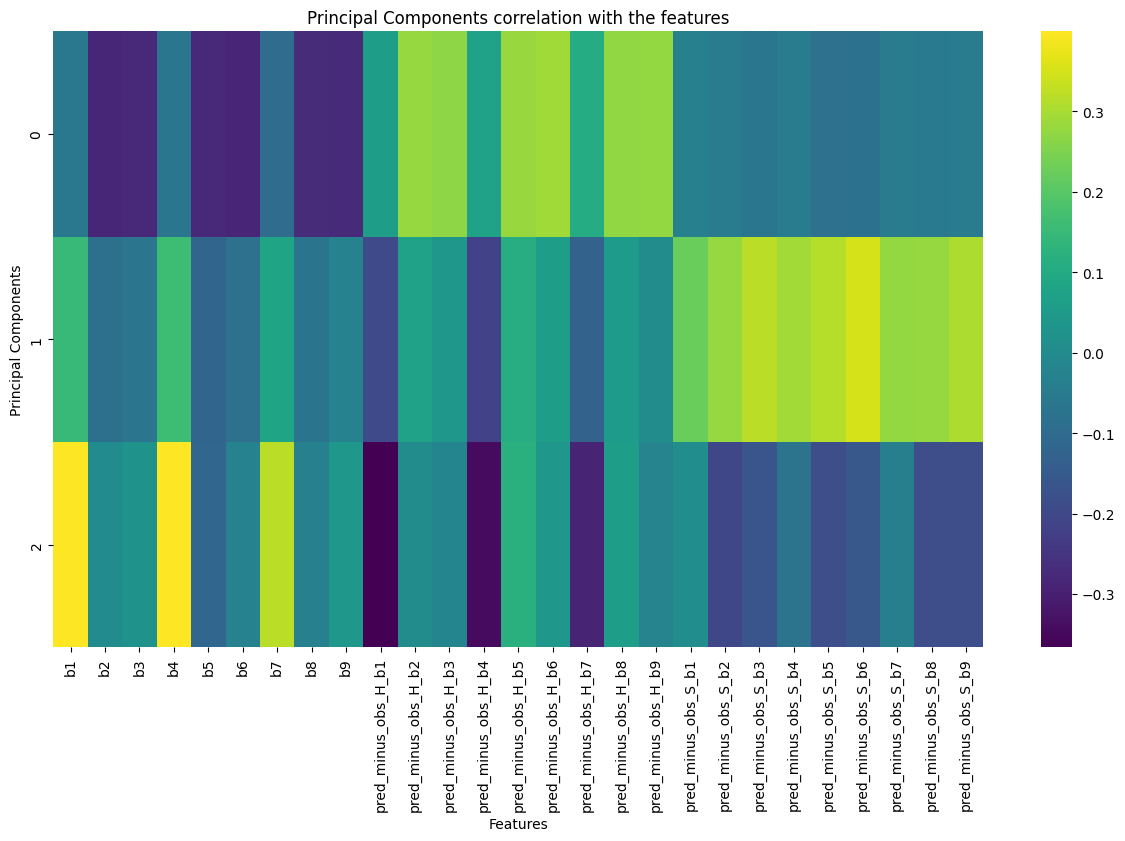

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

## 2 - Clustering


### K-Means

Méotdo del codo:

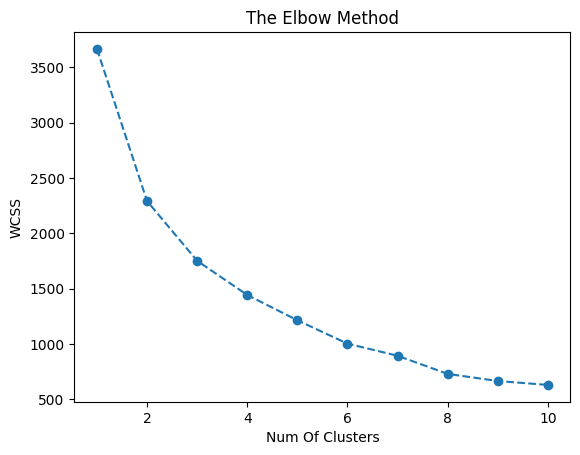

In [16]:

#Método del Codo podemos obtener el nº de clusters
WCSS =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X_pca)
    WCSS.append(km.inertia_)

plt.plot(range(1,11),WCSS, marker='o',linestyle='dashed')
plt.title('The Elbow Method')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.show()

Parece ser que el nº de clusters óptimo es 4. Calculamos el K-means

In [21]:
clusterer = KMeans(n_clusters=4, random_state=10)
y_mean = clusterer.fit_predict(X)


Calculamos el score de silhouete para el K-means

In [22]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(X, y_mean)}')

Silhouette Score(n=4): 0.18577072655053406


Volvemos a plotear los datos con los clusters obtenidos.

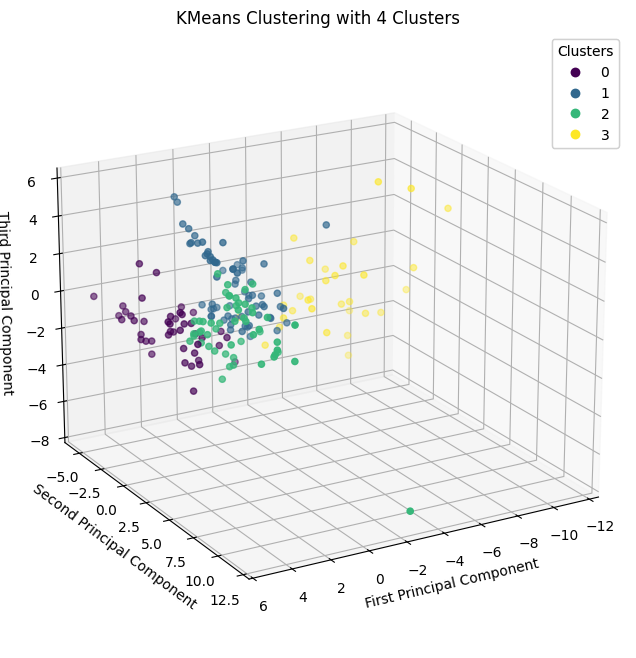

In [23]:
#plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_mean, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(20, 60)
plt.title('KMeans Clustering with 4 Clusters')
plt.show()

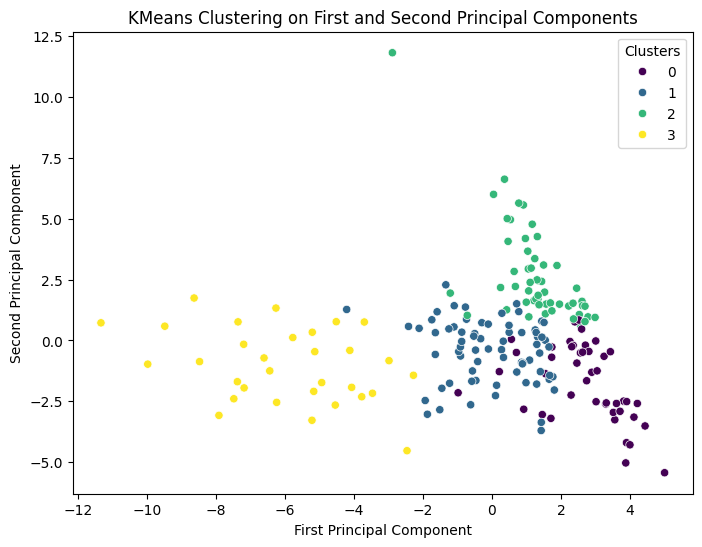

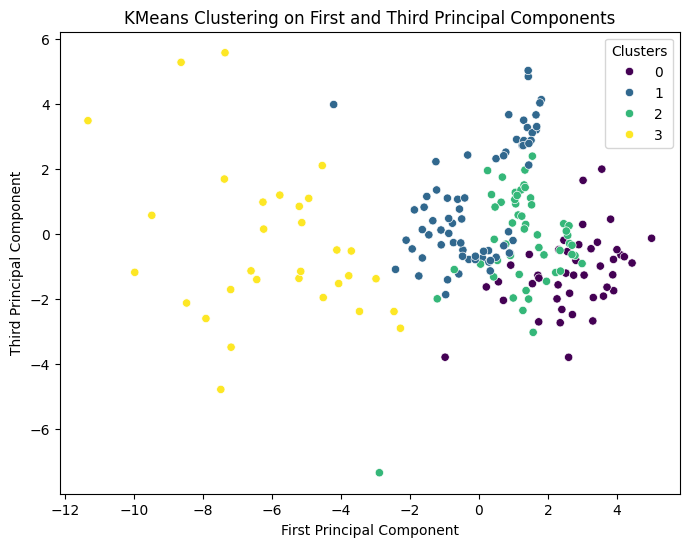

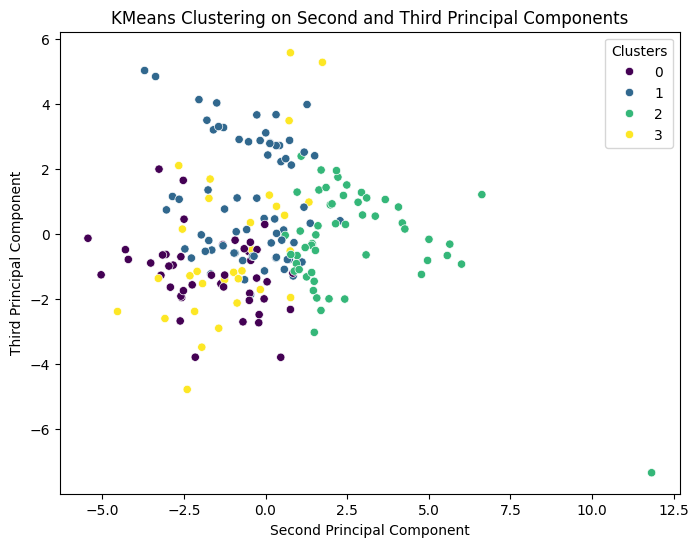

In [24]:
# First vs Second Principal Component
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_mean, palette='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on First and Second Principal Components')
plt.legend(title='Clusters')                                                                                                                                                            
plt.show()

# First vs Third Principal Component
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 2], hue=y_mean, palette='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('KMeans Clustering on First and Third Principal Components')
plt.legend(title='Clusters')
plt.show()

# Second vs Third Principal Component
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 2], hue=y_mean, palette='viridis')
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('KMeans Clustering on Second and Third Principal Components')
plt.legend(title='Clusters')
plt.show()

### DBSCAN

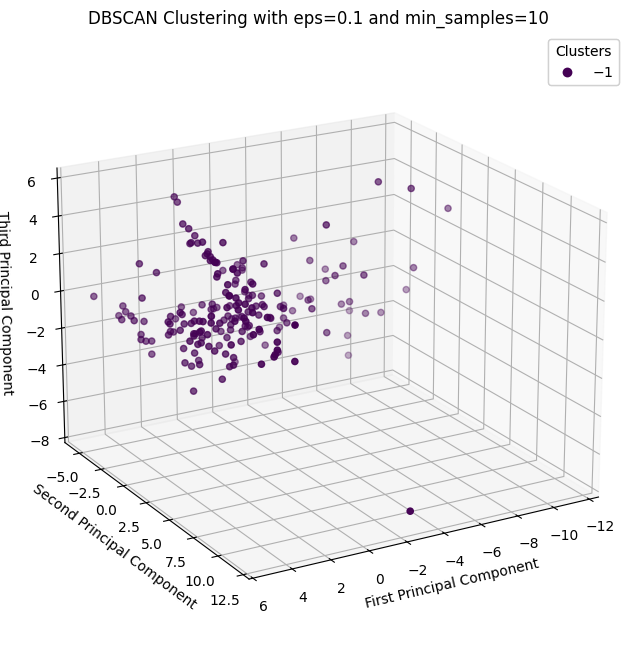

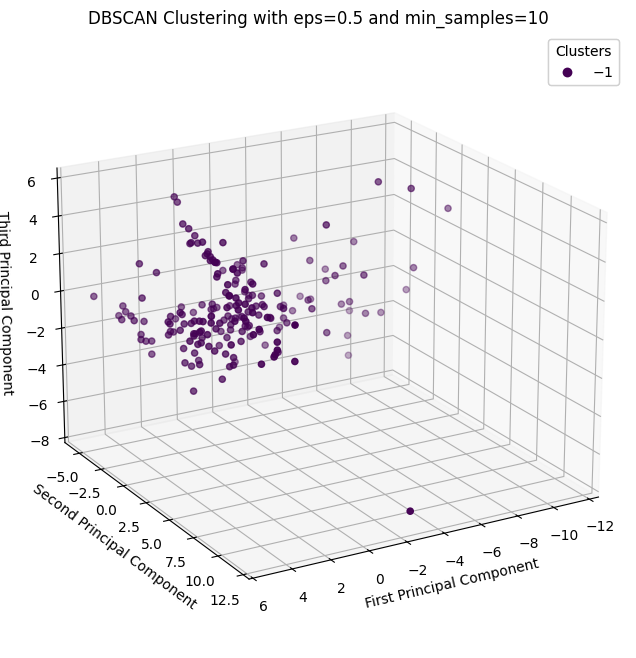

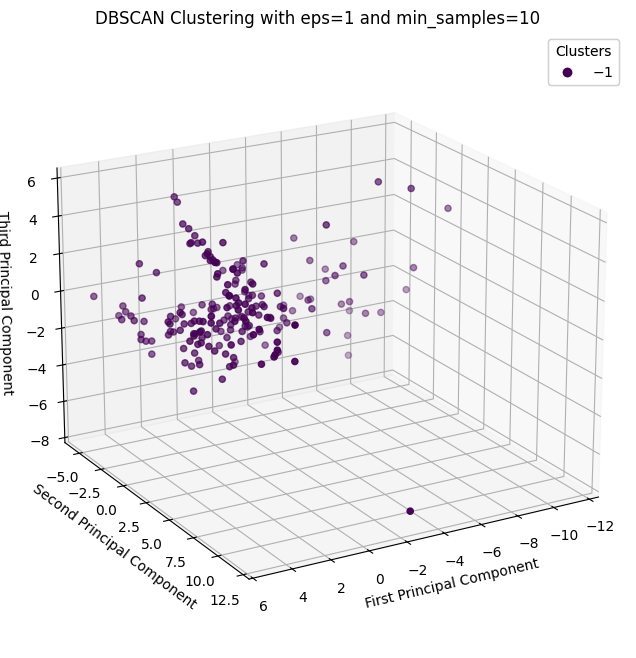

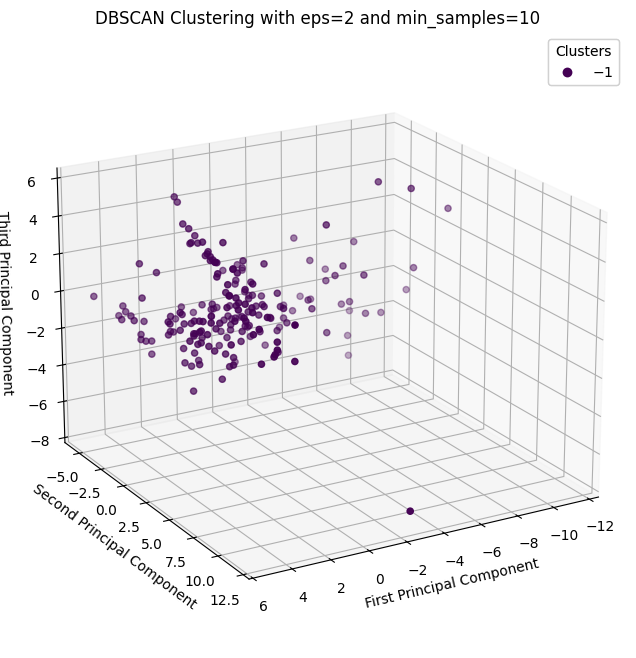

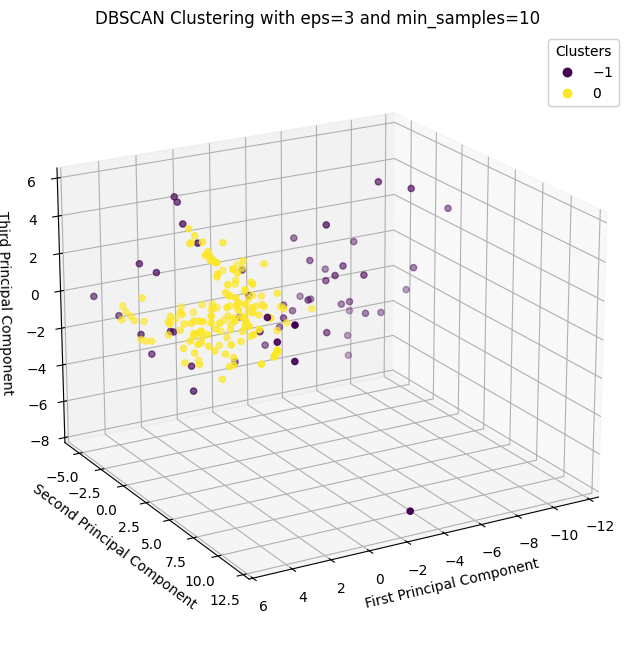

In [25]:

param_grid = {
    'eps': [0.1, 0.5, 1,2,3],
    'min_samples': [3, 5, 10]
}
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.view_init(20, 60)
    plt.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
    plt.show()




Para este tipo de distribución de datos, el método DBSCAN es poco efectivo, ya que no es muy capaz de separar en clusters

### Clustering Jerárquico

Probamos a hacer clustering jerárquico con diferentes métodos de enlace (ward, complete, average, single). Visualizamos el resultado y el dendograma para cada uno de ellos.

Linkage: ward


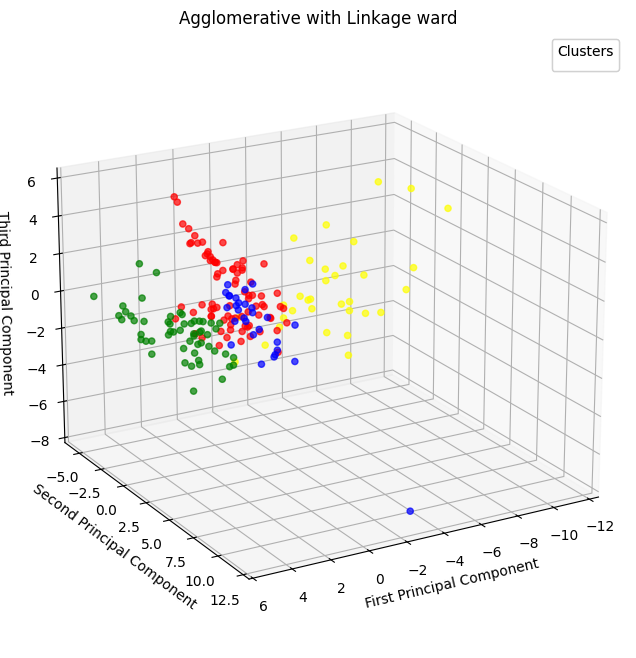

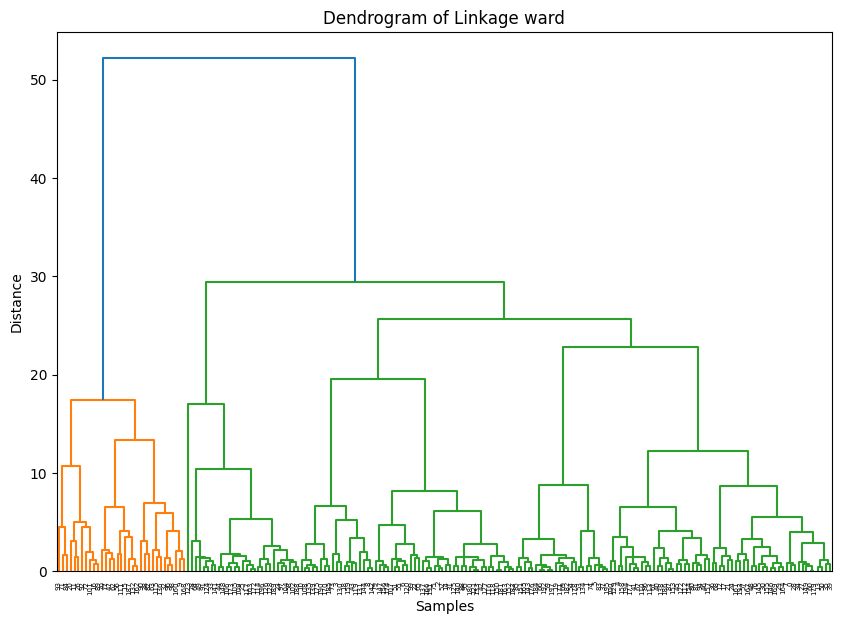

Linkage: single


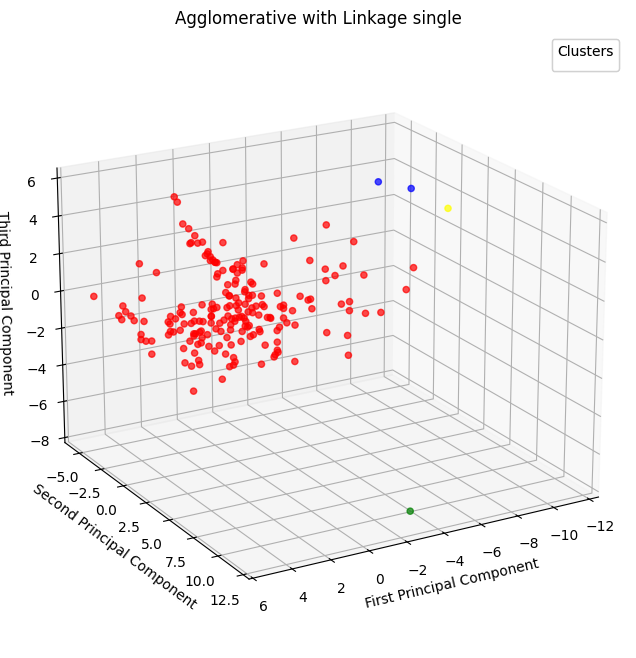

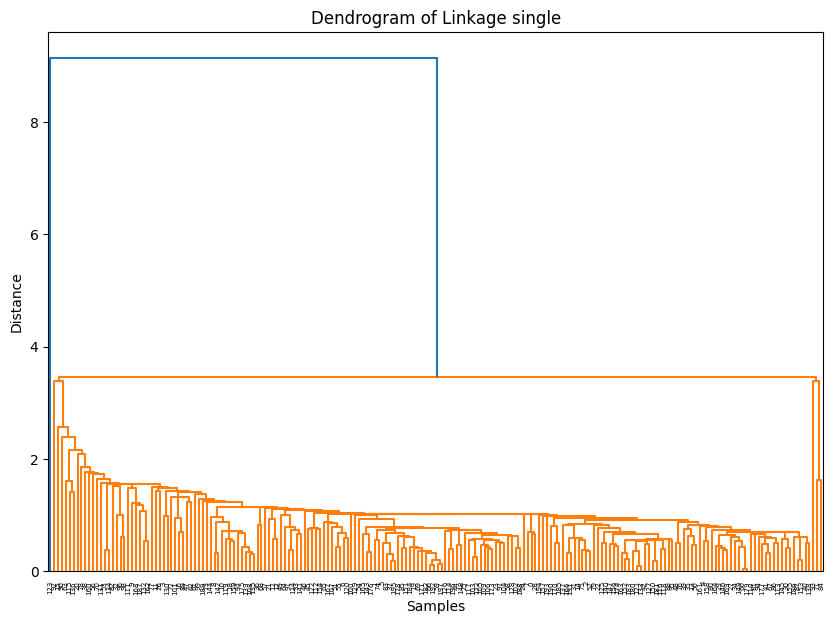

Linkage: complete


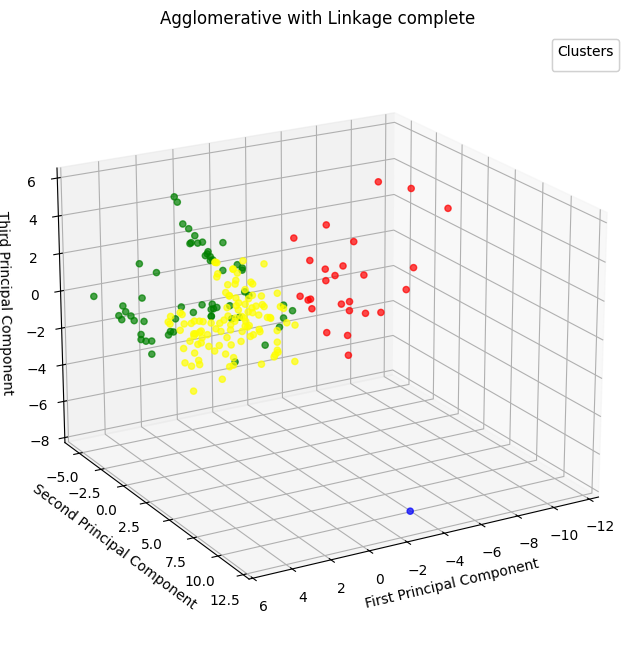

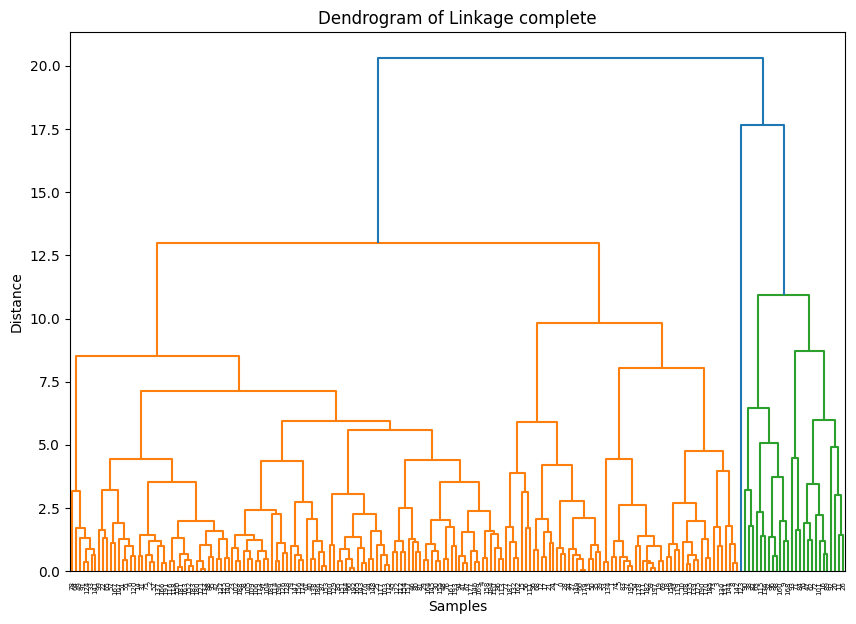

Linkage: average


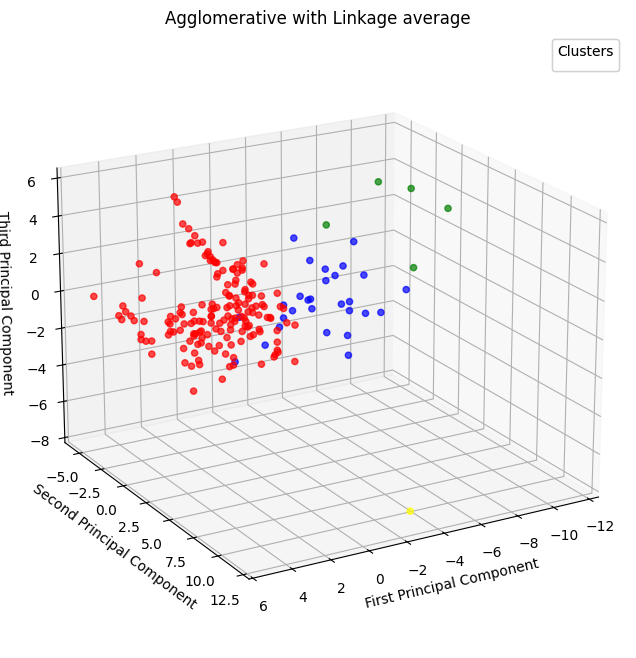

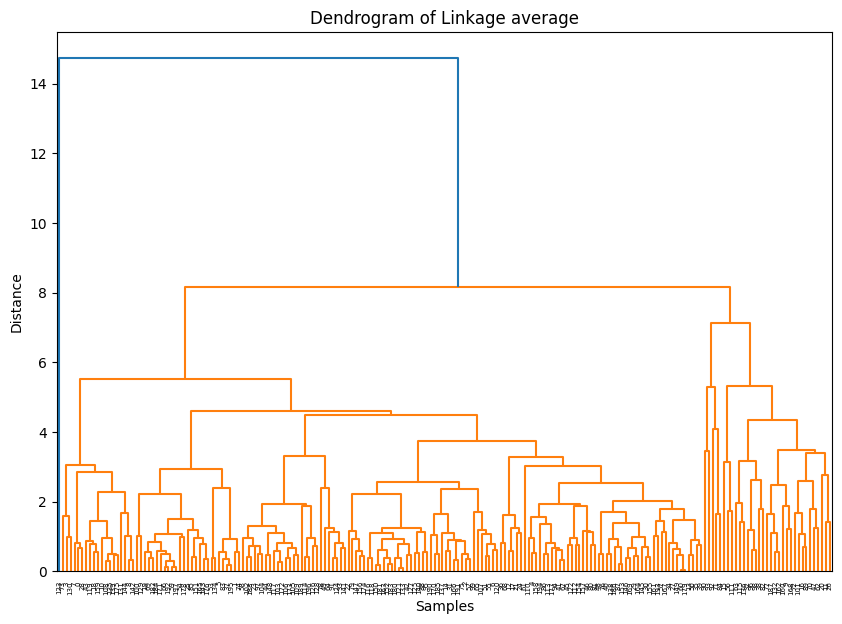

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkages = ['ward', 'single', 'complete', 'average']

for link in linkages:
    agglo = AgglomerativeClustering(n_clusters=4, linkage=link)
    agglo.fit(X_pca)
    myColors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow',} 

    print(f"Linkage: {link}")

    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.view_init(20, 60)
    plt.title(f'Agglomerative with Linkage {link}')
    plt.show()

    # Generate the linkage matrix
    Z = linkage(X_pca, link)

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram of Linkage {link}')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

Tampoco es el clustering que mejor funciona, pero dentro del clustering jerárquico el linkage  ward y complete se comportan mejor.